In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'eye-diseases-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2440665%2F4130910%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240227%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240227T191709Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da62c2dee8170e3b83e969739f12e46642558b3333d686652f68fe9c8203c10a1029ef8e96eb3f3046faa4e134349604c3455b598599f52c77f7cdd7dde4907ee00ad691a73b98cca18b7f8b7ac4852b1bc11b852028c75f9ef36cd7c3f16f67d262e3661933153a8c947f8354ef111cd5d3e4c75cd6c9f1d0927ba1efdf2959784329b16ef71894950fd2474ab0b8cf5b59c46a58c76d4c5f65c47d697c7f6a3654a15f5bf0b0465135eb87f37281b48d4a3440427fa7d586b78f2cb895587a6c3f495465451bc6ac5c487d5c623aab9b35fa3dc468557b2d4c33ed54c2e33e00704ac169a1ebde9486b99a3c4f2feca74171558371035bdba7240d009f07315'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 771355331 bytes downloaded
Downloaded and uncompressed: eye-diseases-classification
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eye-diseases-classification/dataset/glaucoma/_368_4106148.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_198_4839828.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/1371_right.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_251_8769594.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/Glaucoma_066.png
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_187_9314717.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/178_left.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_347_1718283.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_222_8813596.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/1496_right.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_120_7137220.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_397_9607497.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_354_7736360.jpg
/kaggle/input/eye-di

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
IMG_SIZE=(256,256)
BCH_SIZE=32

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/eye-diseases-classification/dataset",
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BCH_SIZE
)

Found 4217 files belonging to 4 classes.


In [ ]:
dataset.class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [ ]:
len(dataset)

132

In [ ]:
132*32

4224

In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[3 3 1 3 3 0 3 2 1 2 3 1 3 3 1 1 2 2 1 3 3 2 1 2 3 3 0 3 3 3 2 2]


In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)
    print()
    print(image_batch[0].numpy())

(256, 256, 3)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


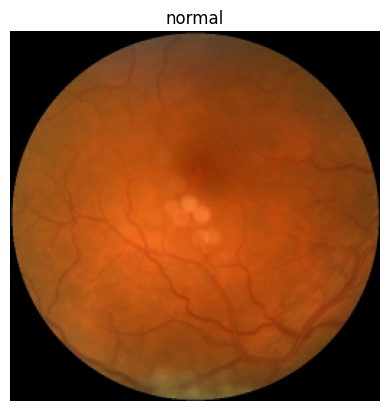

In [ ]:
# Visualize the images
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(dataset.class_names[label_batch[0]])
    plt.axis("off")

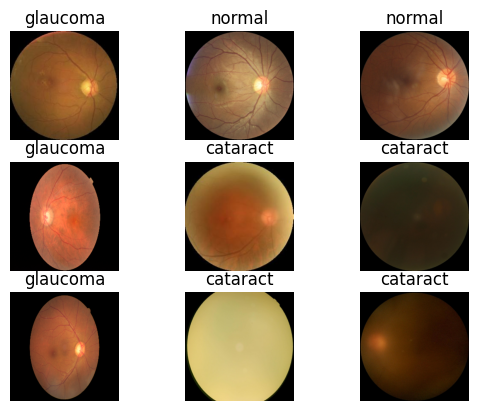

In [ ]:
# Lets display 9 images
for image_batch,label_batch in dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(dataset.class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
train_size=0.8
len(dataset)*train_size

105.60000000000001

In [ ]:
train_ds=dataset.take(105)
len(train_ds)

105

In [ ]:
test_ds=dataset.skip(105)
len(test_ds)

27

In [ ]:
val_sized=0.1
len(dataset)*val_sized

13.200000000000001

In [ ]:
val_ds=test_ds.take(13)
len(val_ds)

13

In [ ]:
test_ds=test_ds.skip(13)
len(test_ds)

14

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(test_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds),len(val_ds),len(test_ds)

(105, 13, 14)

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# scaled images
resize_n_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
# Data Augmentation (to make model robust)
Data_aug=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape=(32,256,256,3)
n_classes=4

model=models.Sequential([
    resize_n_rescale,
    Data_aug,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=50,
    batch_size=BCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
105/105 [==============================] - 57s 281ms/step - loss: 1.0793 - accuracy: 0.5163 - val_loss: 0.9771 - val_accuracy: 0.5457
Epoch 2/50
105/105 [==============================] - 6s 60ms/step - loss: 0.8437 - accuracy: 0.6191 - val_loss: 0.9689 - val_accuracy: 0.5817
Epoch 3/50
105/105 [==============================] - 6s 59ms/step - loss: 0.7462 - accuracy: 0.6621 - val_loss: 0.8240 - val_accuracy: 0.6298
Epoch 4/50
105/105 [==============================] - 6s 58ms/step - loss: 0.7116 - accuracy: 0.6871 - val_loss: 0.7661 - val_accuracy: 0.6827
Epoch 5/50
105/105 [==============================] - 6s 59ms/step - loss: 0.6711 - accuracy: 0.7030 - val_loss: 0.8073 - val_accuracy: 0.7212
Epoch 6/50
105/105 [==============================] - 6s 59ms/step - loss: 0.6296 - accuracy: 0.7331 - val_loss: 0.7395 - val_accuracy: 0.7163
Epoch 7/50
105/105 [==============================] - 6s 60ms/step - loss: 0.5971 - accuracy: 0.7429 - val_loss: 0.6995 - val_accuracy: 0.72

In [ ]:
scores=model.evaluate(test_ds)

In [ ]:
scores

In [ ]:
history

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
history.history['accuracy']

In [ ]:
len(history.history['accuracy'])

In [ ]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]

loss=history.history["loss"]
val_loss=history.history["val_loss"]

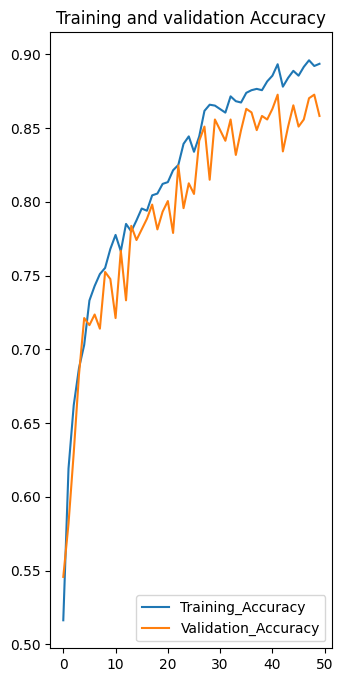

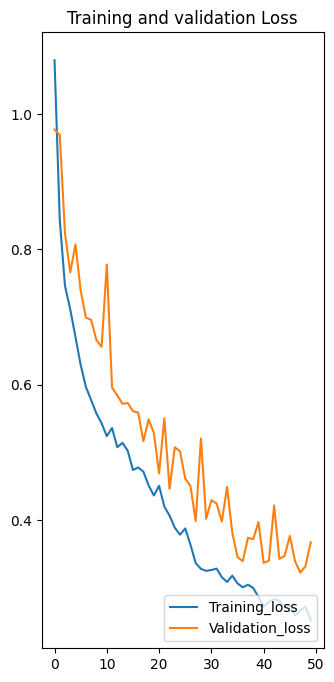

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label="Training_Accuracy")
plt.plot(range(50),val_acc,label="Validation_Accuracy")
plt.legend(loc="lower right")
plt.title("Training and validation Accuracy")

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),loss,label="Training_loss")
plt.plot(range(50),val_loss,label="Validation_loss")
plt.legend(loc="lower right")
plt.title("Training and validation Loss")
plt.show()

first: 
actual:  diabetic_retinopathy
1/1 [==============================] - 0s 30ms/step
Predicted:  diabetic_retinopathy


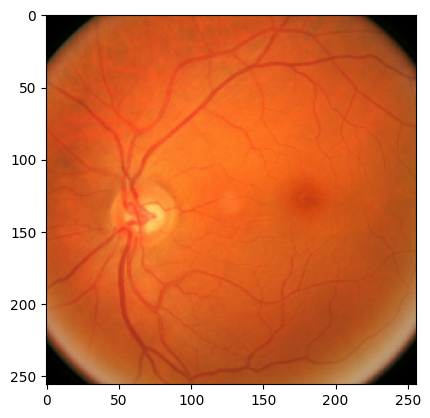

In [ ]:
for images_batch,labels_batch in test_ds.take(1):
  one_img=images_batch[0].numpy().astype("uint8")
  one_lebel=labels_batch[0].numpy()

  print("first: ")
  plt.imshow(one_img)
  print("actual: ",dataset.class_names[one_lebel])

  batch_pred=model.predict(images_batch)
  print("Predicted: ",dataset.class_names[np.argmax(batch_pred[0])])

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  predictions = model.predict(img_array)
  predicted_class = dataset.class_names[np.argmax(predictions)]
  confidence = np.max(predictions)
  return predicted_class, confidence

1/1 [==============================] - 0s 18ms/step


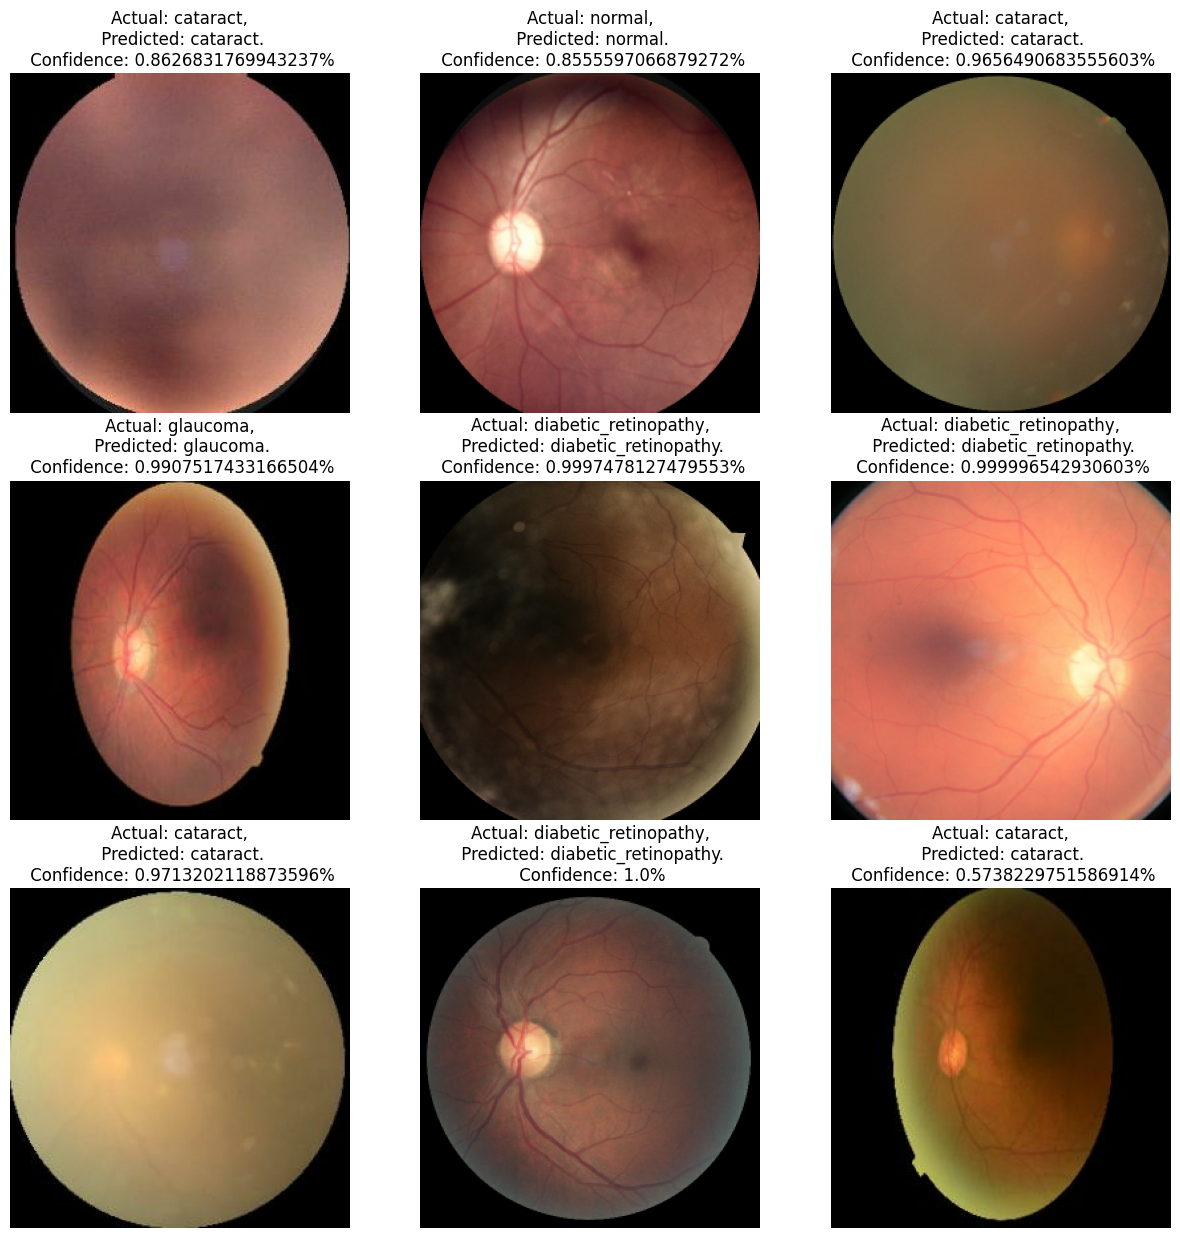

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class, confidence = predict(model, images[i])
    actual_class = dataset.class_names[labels[i]]
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")